# Includes

In [2]:
from __future__ import print_function

import csv
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from scipy.stats import kde

from hp import HP

%matplotlib inline

dev = "cuda:0"

In [3]:
data = []
with open('stability_data.csv') as csvfile:
     reader = csv.reader(csvfile, delimiter=',')
     for row in reader:
         data.append(row)
e = np.array([int(r[2]) for r in data])
len(e), min(e), max(e)            

(100000, -15, 0)

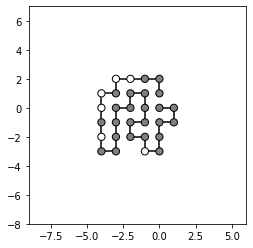

In [4]:
i = np.argmin(e)
hp = HP(data[i][0],data[i][1])
hp.show(plt.gca())

Text(0, 0.5, 'Energy')

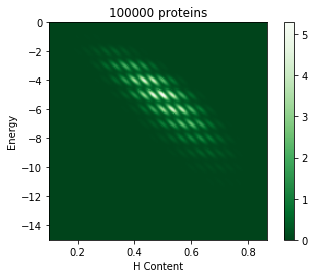

In [5]:
a = np.array([[len([c for c in list(row[0]) if c == "H"]), int(row[2])] for row in data])
x = a[:,0]/30
y = a[:,1]
nbins=200
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap="Greens_r")

x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect((x1-x0)/(y1-y0))
plt.colorbar();
plt.title("%d proteins" % len(data))
plt.xlabel("H Content")
plt.ylabel("Energy")

Text(0, 0.5, 'Energy')

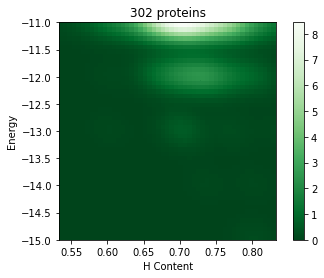

In [6]:
lowest = [x for x in data if int(x[2]) < -10]
len(lowest)
a = np.array([[len([c for c in list(row[0]) if c == "H"]), int(row[2])] for row in lowest])
x = a[:,0]/30
y = a[:,1]
nbins=50
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap="Greens_r")

x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect((x1-x0)/(y1-y0))
plt.colorbar();
plt.title("%d proteins" % len(lowest))
plt.xlabel("H Content")
plt.ylabel("Energy")

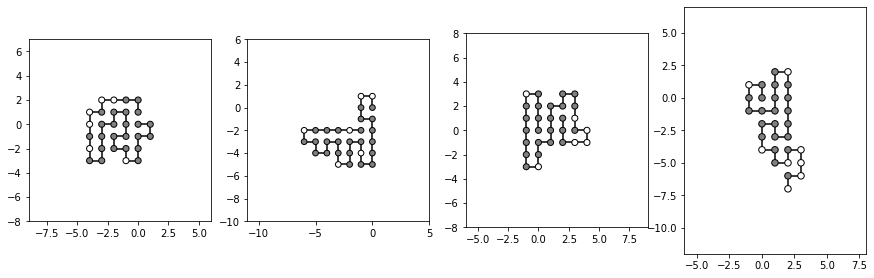

In [7]:
L = [x for x in data if int(x[2]) < -13]
fig,ax = plt.subplots(1,len(L),figsize=(15,10))
for i,p in enumerate(L):
    hp = HP(p[0], p[1])
    hp.show(ax[i])